#                           TUTORIAL 1 : Lagrange and Hermite interpolation

---------------------------------------------------------------------------------------------------------------------




# PART 1: Lagrange  interpolation and Runge phenomenon

The aim here is to show Runge's phenomenon for the polynomial interpolation. We are going to implement an algorithm that is linear in the number of nodes. 

Let $f: [a,b] \to \mathbb{R}$ a function and $x_0,\cdots,x_n$ in $[a,b]$. We recall that the Lagrange polynomial $P_n$ is given by the following formula
$$ P_n(x)  = f(x_0) + \sum_{k=1}^n f[x_0,\cdots,x_k] (x-x_0)\cdots(x-x_{k-1}),$$
where
$$
 f[x_j,x_{j+1},\cdots,x_k] = \frac{f[x_{j+1},\cdots,x_{k}] - f[x_j,\cdots,
      x_{k-1}]}{x_k - x_j}
      \quad \mbox{and}\quad f[x_j]=f(x_j).
$$
The goal is to implement the evaluation of $P_n$ using this formula in $O(n)$ operations. 


## 1) Evaluation of a polynomial in the Newton basis
Given a family of real numbers $x_0 <x_1\cdots < x_{n-1}$, one consider the polynomial $P$ over the form
 $$P(x) = a_0 + a_1 (x - x_0) + a_2 (x - x_0) (x - x_1) + \cdots + a_n (x - x_0) \cdots
  (x - x_{n-1}).$$ 
  Write a function $\textit{lagrange_newton}$ that associates to two lists of real numbers $(x_i)$, $(a_i)$ and a real  $x$ the value $P(x)$ (and such that the number of operations is in  $\mathrm{O}(n)$).


In [2]:
import numpy as np

# Attention size(A) = size(X) (but we don't use le last element of X : X(n-1))
def lagrange_newton(A,X,x):
    result = A[0]
    temp = 1
    for i in range(1,len(A)):
        temp *=(x-X[i-1])
        result += A[i]*temp
    
    return result

## 2) Evaluation of the Newton coefficients

Write a function $\textit{coef_newton}$ that associates to $X=(x_0,\cdots,x_n)$ and $F=(f(x_0),\cdots,f(x_n))$ the coefficients of the Lagrange polynomial in the basis 
$$\Big( (x-x_0)\cdots (x-x_{k}) \Big)_{0\leq k \leq n-1}.$$

In [3]:
# It returns size(Coef) = size(X)
def coef_newton(X,F):
    Coef = [None]*len(X)
    A = np.diag(F)    
    for i in range(1,len(X)): #loops on the diagonals
        for j in range(len(X)-i): # number of elements on the diagonals
            A[j,i+j] = (A[j,i+j-1] - A[j+1,i+j])/(X[j]-X[i+j])
    
    for i in range(len(X)):
        Coef[i]=A[0,i]
        
    return Coef

## 3) Lagrange polynomial evaluation

Write a function $\textit{lagrange_polynomial}$ that calculates the Lagrange polynomial on $X,F$.

In [4]:
def lagrange_polynomial(X,F,x):
    Lagx = lagrange_newton(coef_newton(X,F), X, x)
    return Lagx

## 4) Exemple 1 : sinus

Plot the Lagrange polynomial for the function $\sin$ for $n=3,5,10$. What do you observe ?

Text(0.5, 0.98, 'Lagrange interpolation of the Sinus function')

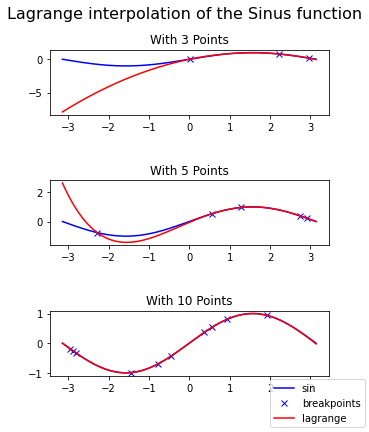

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

values = [3,5,10]
fig, ax = plt.subplots(len(values),1)
fig.subplots_adjust(hspace=1)
fig.set_size_inches(5, 2*len(values))

#  plot of sinus curve
x = np.linspace(-np.pi,np.pi,500)
f = np.sin
for i in range(len(values)):
    ax[i].plot(x,f(x),'b',label = "sin")

for i in values:
    # breakpoints of the curve, set randomly on [-pi, pi]
    breaks = 2*np.pi*np.random.random_sample(i) - np.pi
    f_breaks = f(breaks)
    ax[values.index(i)].plot(breaks, f_breaks, 'bx', label = "breakpoints")

    ax[values.index(i)].set_title("With " + str(i) + " Points")

    lagrange_curve = lagrange_polynomial(breaks, f_breaks,x)

    ax[values.index(i)].plot(x,lagrange_curve, 'r-', label = "lagrange")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')
fig.suptitle("Lagrange interpolation of the Sinus function", fontsize=16)


With ten points the lagrange interpolation is basically identical to the sinus function

## 5) Exemple 2 : the square function

Plot the Lagrange polynomial and the square function for $n=2,3,5$. What do you observe ?

Text(0.5, 0.98, 'Lagrange interpolation of the square function')

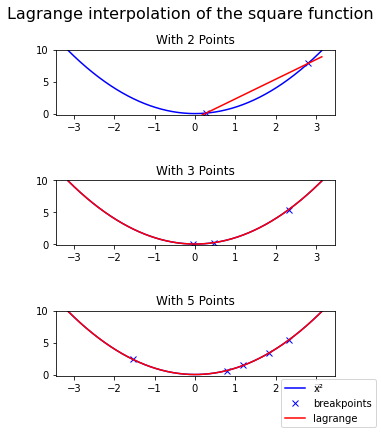

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

values = [2,3,5]
fig, ax = plt.subplots(len(values),1)
fig.subplots_adjust(hspace=1)
fig.set_size_inches(5, 2*len(values))

#  plot of sinus curve
x = np.linspace(-np.pi,np.pi,500)
f = lambda x : x**2
for i in range(len(values)):
    ax[i].plot(x,f(x),'b',label = "x²")
    ax[i].set_ylim((-0.2, 10))

for i in values:
    # breakpoints of the curve, set randomly on [-pi, pi]
    breaks = 2*np.pi*np.random.random_sample(i) - np.pi
    f_breaks = f(breaks)
    ax[values.index(i)].plot(breaks, f_breaks, 'bx', label = "breakpoints")

    ax[values.index(i)].set_title("With " + str(i) + " Points")

    lagrange_curve = lagrange_polynomial(breaks, f_breaks,x)

    ax[values.index(i)].plot(x,lagrange_curve, 'r-', label = "lagrange")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')
fig.suptitle("Lagrange interpolation of the square function", fontsize=16)

## 6) Example 3. Runge phenomenon

Plot the Lagrange polynomial the function $f(x)=1/(1+25x^2)$ for $n=5,10,13$. What do you observe ?


Text(0.5, 0.98, 'Lagrange interpolation of the $f(x)=1/(1+25x^2)$ function')

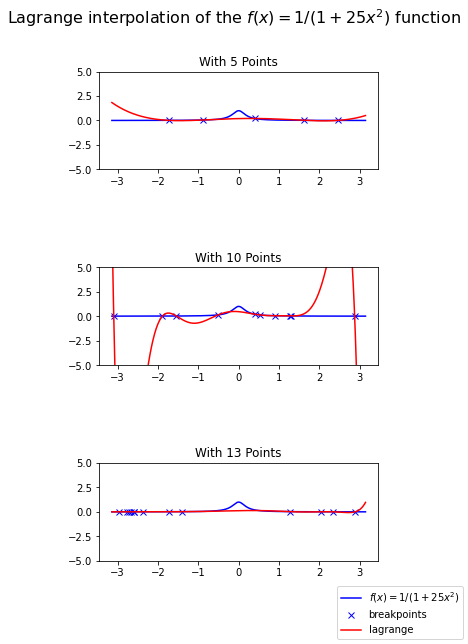

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

values = [5,10,13]
fig, ax = plt.subplots(len(values),1)
fig.subplots_adjust(hspace=1)
fig.set_size_inches(5, 3*len(values))

#  plot of sinus curve
x = np.linspace(-np.pi,np.pi,500)
f = lambda x : 1/(1+25*x**2)
for i in range(len(values)):
    ax[i].plot(x,f(x),'b',label = "$f(x)=1/(1+25x^2)$")
    ax[i].set_ybound(lower=-0.2, upper=1.5)
    ax[i].set_ylim((-0.2, 1.5))

for i in values:
    # breakpoints of the curve, set randomly on [-pi, pi]
    breaks = 2*np.pi*np.random.random_sample(i) - np.pi
    f_breaks = f(breaks)
    ax[values.index(i)].plot(breaks, f_breaks, 'bx', label = "breakpoints")

    ax[values.index(i)].set_title("With " + str(i) + " Points")

    lagrange_curve = lagrange_polynomial(breaks, f_breaks,x)

    ax[values.index(i)].plot(x,lagrange_curve, 'r-', label = "lagrange")
    ax[values.index(i)].set_ylim(-5,5)

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')
fig.suptitle("Lagrange interpolation of the $f(x)=1/(1+25x^2)$ function", fontsize=16)

# PART 2: Hermite Interpolation
The goal of this part is to provide a function $\textit{hermite}$ that interpolates both points and tangents. 
### 1) First define the functions $h_0$, $h_1$, $h_2$ and $h_3$ from $[0,1]$ to $\mathbb{R}$

In [8]:
h0 = lambda x : 1 - 3*x**2 + 2*x**3
h1 = lambda x : 3*x**2 - 2*x**3
h2 = lambda x : x - 2*x**2 + x**3
h3 = lambda x : x**3 - x**2



### 2) Define a function $\textit{hermite}(Points,Vectors,Parameters,t)$. 
Here Points and Vectors are $2*n$ arrays, Parameter is a $1*n$ array and $t$ is a real number. The functions returns the evaluation at the parameter $t$.

In [9]:
def two_pts_hermite(points, vectors, parameters, t):
	return points[1,0]*h0(t) + points[1,1]*h1(t) + (parameters[1]-parameters[0])*(vectors[1,0]*h2(t) + vectors[1,1]*h3(t))

# calculates the interpolation at point t
def hermite(Points,Vectors,Parameters,t):    
    i=0
    # finds where to do the two point interpolation
    while not (Parameters[i] <= t <= Parameters[i+1]):
        i+=1
        
    return two_pts_hermite(Points[:,i:i+2], Vectors[:,i:i+2], Parameters[i:i+2], (t-Parameters[i])/(Parameters[i+1]-Parameters[i]))

### 3) Example with the function $x\mapsto 1/(1+25*x^2)$

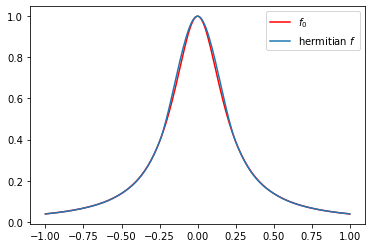

In [10]:
n=9

x = np.linspace(-1,1,200)
# Define Points, Vectors and Parameters for the function x->1/(1+25x*x)
Parameters = np.linspace(-1,1,n)# les noeuds
Points = np.zeros((2,len(Parameters)))
Points[0,:] = np.array(Parameters)
Points[1,:] = 1/(1+25*Parameters**2)# les valeurs aux noeuds
Vectors = np.ones((2,len(Parameters)))
Vectors[1,:] = -50*Parameters / ((1+25*Parameters**2)**2)

# Plot the function x->1/(1+25x*x)
f = 1/(1+25*x*x)
f_hermit= np.array([hermite(Points, Vectors, Parameters, x[i]) for i in range(len(x))])

plt.plot(x,f,'r',label = r"$f_0$")
plt.plot(x, f_hermit, label = r"hermitian $f$")


plt.legend()
	
# Plot the hermite spline associated to Points, Vectors and Parameters
# TO BE DONE